# Read image and cut into 100 px x 100 px patches

In [63]:
import cv2

In [64]:
img = cv2.imread("shadow_remove.jpg")
img

array([[[ 18,  56,  50],
        [  4,  42,  36],
        [  0,  32,  25],
        ...,
        [ 67, 182, 163],
        [ 34, 150, 143],
        [  8, 127, 126]],

       [[ 56, 100,  93],
        [ 42,  87,  78],
        [ 32,  73,  65],
        ...,
        [ 83, 185, 167],
        [ 53, 156, 149],
        [ 26, 128, 127]],

       [[ 49, 109,  98],
        [ 42, 100,  89],
        [ 39,  92,  82],
        ...,
        [106, 186, 169],
        [ 71, 145, 139],
        [ 27,  99,  99]],

       ...,

       [[156, 233, 205],
        [ 86, 171, 139],
        [ 70, 165, 131],
        ...,
        [ 35,  91,  68],
        [ 43, 100,  75],
        [ 51, 108,  83]],

       [[129, 216, 188],
        [ 78, 169, 136],
        [ 72, 167, 130],
        ...,
        [ 46,  97,  77],
        [ 38,  99,  73],
        [ 33, 100,  71]],

       [[ 30, 122,  93],
        [ 48, 142, 108],
        [ 67, 160, 121],
        ...,
        [ 48,  96,  78],
        [ 17,  82,  56],
        [  0,  72,  42]]

In [3]:
img.shape

(20000, 20000, 3)

In [4]:
# Display image, note that plt.imshow(img) and plt.show() won't work because the image is too big
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### One way to get patches, doesn't preserve order? Skip for now

In [20]:
from sklearn.feature_extraction import image

In [14]:
patches = image.extract_patches_2d(img, (100, 100), max_patches= 40000) #img is too large

C:\Anaconda\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


In [21]:
?image.extract_patches_2d

### Alternatively, get patches by matrix slicing, preserves order

In [65]:
from itertools import product
patches0 = [img[i*100:(i+1)*100,j*100:(j+1)*100] for i, j in product(range(int(img.shape[0]/100)), range(int(img.shape[1]/100)))]

In [7]:
import numpy as np

In [66]:
patches0 = np.asarray(patches0)

In [67]:
patches0.shape

(40000, 100, 100, 3)

### need to resize patches to feed into pretrained deep network, this is for vgg and resnet models

In [10]:
from copy import deepcopy

patches = deepcopy(patches0)

In [11]:
patches.resize(40000, 224, 224, 3)

In [12]:
patches.shape

(40000, 224, 224, 3)

### on the other hand this is for inception model***

In [56]:
from copy import deepcopy

patches = deepcopy(patches0)

In [57]:
patches.resize(40000, 299, 299, 3)

#### other, just to test

In [ ]:
# just to test
i=0
for patch in patches:
    cv2.imshow('patch' + str(i), patch)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    i += 1

# Feed patches into pretrained various deep networks

In [13]:
import keras
from keras.applications import vgg19, vgg16, inception_v3, resnet50
from keras.models import Model

#Load the VGG19 model
vgg19_model = vgg19.VGG19(weights='imagenet')#include_top=True, weights='imagenet')#, input_shape=(100, 100, 3))
vgg19_model_fc1 = Model(inputs=vgg19_model.input, outputs=vgg19_model.get_layer('fc1').output)

#Load the VGG16 model
vgg16_model = vgg16.VGG16(weights='imagenet')#include_top=False, weights='imagenet', input_shape=(100, 100, 3))
vgg16_model_fc1 = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('fc1').output)

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')#include_top=False, weights='imagenet', input_shape=(100, 100, 3))
inception_model_avg_pool = Model(inputs=inception_model.input, outputs=inception_model.get_layer('avg_pool').output)

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')#include_top=False, weights='imagenet', input_shape=(100, 100, 3))
resnet_model_avg_pool = Model(inputs=resnet_model.input, outputs=resnet_model.get_layer('avg_pool').output)
resnet_model_fc1000 = Model(inputs=resnet_model.input, outputs=resnet_model.get_layer('fc1000').output)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [36]:
inception_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [33]:
resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## VGG19

In [14]:
import csv

In [15]:
factor = 100

with open('vgg19_model_fc1_features.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    for i in range(int(patches.shape[0]/factor)):
        print(i)
        # prepare the image for the VGG19 model
        processed_image = vgg19.preprocess_input(patches[i*factor:(i+1)*factor,:,:,:])
        vgg19_model_fc1_features = vgg19_model_fc1.predict(processed_image)
        writer.writerows(vgg19_model_fc1_features)
writeFile.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
import pandas as pd

vgg19_model_fc1_features = pd.read_csv('vgg19_model_fc1_features.csv', sep=',', header=None)

vgg19_model_fc1_features

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.000000,0.0,0.000000,0.000000,1.840619,0.000000,0.000000,2.607357,0.000000,...,0.722572,0.000000,0.584973,0.0,5.366273,0.000000,0.873570,0.000000,3.765024,0.000000
1,0.0,0.000000,0.0,0.817244,0.000000,0.793860,0.000000,0.000000,0.000000,0.000000,...,1.805279,0.000000,4.263259,0.0,3.756124,0.000000,3.935438,0.000000,2.217465,0.000000
2,0.0,0.000000,0.0,1.409605,0.000000,1.455148,0.000000,0.000000,1.130333,0.000000,...,4.547325,0.000000,2.458498,0.0,5.126693,0.000000,1.944690,0.000000,4.734775,0.000000
3,0.0,0.000000,0.0,1.687199,0.000000,3.841550,0.000000,0.828788,1.321880,0.000000,...,0.000000,0.000000,0.000000,0.0,2.370861,0.000000,4.607412,0.000000,1.062763,0.000000
4,0.0,0.000000,0.0,0.011653,0.316097,4.447526,0.000000,0.000000,1.638785,0.000000,...,0.000000,0.000000,0.038643,0.0,3.859483,0.000000,1.922681,0.000000,1.478950,0.000000
5,0.0,0.000000,0.0,0.000000,0.000000,5.225165,0.000000,0.000000,2.382124,0.000000,...,3.875746,0.000000,2.358279,0.0,5.807841,0.000000,0.698792,0.000000,4.077060,0.000000
6,0.0,0.000000,0.0,0.316825,0.000000,8.517784,0.000000,0.351873,5.021904,0.000000,...,0.367554,0.000000,0.000000,0.0,2.264327,0.000000,2.723032,0.000000,1.654442,0.000000
7,0.0,0.000000,0.0,0.000000,0.000000,5.229242,0.000000,0.000000,3.408611,0.000000,...,0.038095,0.000000,0.000000,0.0,2.922343,0.000000,3.428387,0.000000,1.471517,0.000000
8,0.0,0.000000,0.0,1.478508,0.000000,5.276069,0.000000,0.000000,4.648095,0.000000,...,0.000000,0.000000,0.000000,0.0,4.613504,0.000000,1.181787,0.848863,0.000000,0.000000
9,0.0,0.000000,0.0,0.837936,0.000000,5.249379,0.000000,0.000000,1.811910,0.000000,...,1.712514,0.000000,0.284970,0.0,2.268377,0.000000,3.977594,0.000000,1.715996,0.000000


In [17]:
vgg19_model_fc1_features.values

array([[0.       , 0.       , 0.       , ..., 0.       , 3.7650242,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 2.2174647,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 4.7347755,
        0.       ],
       ...,
       [0.       , 4.963863 , 0.       , ..., 0.       , 4.436696 ,
        3.064087 ],
       [0.       , 4.963863 , 0.       , ..., 0.       , 4.436696 ,
        3.064087 ],
       [0.       , 4.963863 , 0.       , ..., 0.       , 4.436696 ,
        3.064087 ]])

## VGG16

In [18]:
factor = 100

with open('vgg16_model_fc1_features.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    for i in range(int(patches.shape[0]/factor)):
        print(i)
        # prepare the image for the VGG16 model
        processed_image = vgg16.preprocess_input(patches[i*factor:(i+1)*factor,:,:,:])
        vgg16_model_fc1_features = vgg16_model_fc1.predict(processed_image)
        writer.writerows(vgg16_model_fc1_features)
writeFile.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [55]:
vgg16_model_fc1_features = pd.read_csv('vgg16_model_fc1_features.csv', sep=',', header=None)

vgg16_model_fc1_features

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.257493,0.000000,0.000000,...,0.000000,0.0,2.554471,0.793837,5.341460,0.000000,0.438358,0.000000,0.337547,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,5.266844,3.305715,0.000000,0.000000,...,0.000000,0.0,2.834020,0.142264,7.405517,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,5.971231,2.959305,0.000000,0.000000,...,0.000000,0.0,4.966250,0.000000,2.824276,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.000000,1.929935,3.772087,0.063173,0.000000,0.000000,...,0.000000,0.0,2.721999,2.550848,2.520071,0.000000,7.375533,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,1.556321,5.748743,1.846104,0.000000,0.000000,...,0.000000,0.0,1.196026,0.082787,1.885393,0.000000,3.384544,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,5.138688,2.650337,0.000000,0.000000,...,0.000000,0.0,2.451113,0.000000,2.338740,0.000000,1.291659,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7.866478,0.925416,0.000000,0.000000,...,0.000000,0.0,4.985847,0.000000,1.031450,0.000000,5.207952,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,6.532898,0.000000,0.000000,0.000000,...,0.000000,0.0,1.800207,0.000000,2.993772,0.000000,2.722768,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.0,0.000000,0.986178,6.084032,0.000000,0.000000,0.000000,...,0.000000,0.0,2.861771,0.000000,4.795273,0.000000,3.328080,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.0,0.000000,0.730135,6.580358,1.803364,0.000000,0.000000,...,0.000000,0.0,4.437323,2.001752,4.339545,0.000000,5.390458,0.000000,0.000000,0.000000


In [21]:
vgg16_model_fc1_features.values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.3375473 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.6031728 , 0.        , ..., 1.7739973 , 0.98970115,
        3.9133618 ],
       [0.        , 2.6031728 , 0.        , ..., 1.7739973 , 0.98970115,
        3.9133618 ],
       [0.        , 2.6031728 , 0.        , ..., 1.7739973 , 0.98970115,
        3.9133618 ]])

## Inception_V3***
need to make sure patches is of shape (40000, 299, 299, 3)

In [58]:
factor = 100

with open('inception_model_avg_pool_features.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    for i in range(int(patches.shape[0]/factor)):
        print(i)
        # prepare the image for the Inception model
        processed_image = inception_v3.preprocess_input(patches[i*factor:(i+1)*factor,:,:,:])
        inception_model_avg_pool_features = inception_model_avg_pool.predict(processed_image)
        writer.writerows(inception_model_avg_pool_features)
writeFile.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [59]:
inception_model_avg_pool_features = pd.read_csv('inception_model_avg_pool_features.csv', sep=',', header=None)

inception_model_avg_pool_features

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.133377,0.342677,0.178775,0.041510,1.054686,0.106099,1.170001,2.894825,0.179475,0.856672,...,0.208056,0.224913,0.890212,1.553342,0.000000,0.201990,0.071552,0.202924,0.126114,0.426053
1,0.007326,0.663406,0.164203,0.061827,1.072831,0.070127,0.321701,2.870791,0.140631,1.060015,...,0.279203,0.000000,0.530725,0.584156,0.111898,0.056464,0.671985,0.406721,0.008959,0.277332
2,0.112512,0.841091,0.017433,0.001942,0.913126,0.014176,0.395955,4.062394,0.522530,1.479688,...,0.398116,0.146070,1.779954,2.045502,0.000000,0.000000,0.284544,0.008702,0.000000,0.700210
3,0.033816,1.156380,0.306495,0.008672,1.556419,0.005394,0.563616,3.101686,0.000000,1.247682,...,0.079420,0.125796,1.892406,1.528290,0.040144,0.072892,1.117707,0.071075,0.000000,0.194967
4,0.016031,0.302657,0.065434,0.029422,0.913697,0.080030,0.547041,2.267020,0.172676,1.381185,...,0.128366,0.282915,0.979081,0.687971,0.001321,0.120170,0.651967,0.395407,0.000000,0.628950
5,0.230154,0.484077,0.161016,0.061109,0.884920,0.001861,0.851621,3.412903,0.407954,1.400968,...,0.004182,0.223428,1.569313,1.533685,0.000000,0.011947,0.437442,0.000000,0.002743,0.359423
6,0.024183,0.516743,0.267342,0.093924,0.846058,0.016267,0.429045,3.994485,0.199766,1.604918,...,0.308600,0.133602,1.021257,0.857174,0.016347,0.205531,0.582672,0.000000,0.017292,0.465737
7,0.016232,0.702783,0.297336,0.009691,1.098358,0.000759,0.249113,2.173856,0.046821,2.156245,...,0.006431,0.070181,1.580777,0.806854,0.004010,0.216789,0.243410,0.157750,0.027919,0.340977
8,0.045336,0.688964,0.176718,0.326432,1.009076,0.000000,0.491718,3.854015,0.065917,2.424958,...,0.089019,0.001880,1.742484,1.947779,0.000000,0.315586,0.982776,0.000000,0.000000,0.235982
9,0.194004,0.555916,0.058891,0.025940,1.251170,0.006178,0.573347,3.850273,0.046380,1.588292,...,0.000000,0.183680,1.070214,1.420917,0.000000,0.005425,0.904139,0.126356,0.000965,0.836427


In [60]:
inception_model_avg_pool_features.values

array([[1.3337678e-01, 3.4267694e-01, 1.7877509e-01, ..., 2.0292363e-01,
        1.2611374e-01, 4.2605300e-01],
       [7.3257020e-03, 6.6340630e-01, 1.6420265e-01, ..., 4.0672135e-01,
        8.9593010e-03, 2.7733243e-01],
       [1.1251183e-01, 8.4109110e-01, 1.7432611e-02, ..., 8.7024960e-03,
        0.0000000e+00, 7.0020986e-01],
       ...,
       [6.2521820e-02, 2.5120582e-02, 1.9160949e-01, ..., 3.0395493e-01,
        2.6090738e-01, 3.8802973e-05],
       [6.2521830e-02, 2.5120638e-02, 1.9160938e-01, ..., 3.0395493e-01,
        2.6090756e-01, 3.8790340e-05],
       [6.2521830e-02, 2.5120638e-02, 1.9160938e-01, ..., 3.0395493e-01,
        2.6090756e-01, 3.8790340e-05]])

## ResNet

In [255]:
factor = 100

with open('resnet_model_avg_pool_features.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    for i in range(int(patches.shape[0]/factor)):
        print(i)
        # prepare the image for the Inception model
        processed_image = resnet50.preprocess_input(patches[i*factor:(i+1)*factor,:,:,:])
        resnet_model_avg_pool_features = resnet_model_avg_pool.predict(processed_image)
        writer.writerows(resnet_model_avg_pool_features)
writeFile.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
resnet_model_avg_pool_features = pd.read_csv('resnet_model_avg_pool_features.csv', sep=',', header=None)

resnet_model_avg_pool_features

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.321032,0.000000,0.170868,0.142426,0.156579,0.0,0.000000,0.000000,0.005849,2.299621,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008861,0.000000,0.000000,0.0
1,0.025914,0.077498,0.030362,0.190770,0.409243,0.0,0.011032,0.000000,0.000000,4.696556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014146,0.018252,0.000000,0.0
2,0.101121,0.000000,0.000000,0.001034,0.038722,0.0,0.000000,0.000000,0.001288,2.118429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065086,0.000000,0.000000,0.0
3,0.251231,0.000000,0.000000,0.182683,0.056033,0.0,0.000000,0.000000,0.015174,2.985418,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013374,0.001159,0.000000,0.0
4,0.000000,0.000000,0.023521,0.136637,0.001189,0.0,0.000000,0.000000,0.000000,3.385298,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003623,0.000004,0.000000,0.000000,0.0
5,0.360913,0.000000,0.059153,0.000000,0.001419,0.0,0.000000,0.000000,0.004763,2.963839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.100614,0.000000,0.000000,0.000000,0.000000,0.0,0.004615,0.000000,0.010540,2.927769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049738,0.000000,0.000000,0.0
7,0.265906,0.000000,0.000000,0.000315,0.058065,0.0,0.000000,0.000000,0.151095,2.882999,...,0.000000,0.000000,0.000000,0.005092,0.000000,0.000000,0.072101,0.000000,0.000000,0.0
8,0.437832,0.000000,0.000000,0.027636,0.003797,0.0,0.000000,0.000000,0.062646,2.814628,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146083,0.000000,0.000000,0.0
9,0.186707,0.000000,0.000000,0.013718,0.002266,0.0,0.000000,0.000000,0.037454,3.009356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065312,0.000000,0.000000,0.0


In [23]:
resnet_model_avg_pool_features.values

array([[0.3210324 , 0.        , 0.17086771, ..., 0.        , 0.        ,
        0.        ],
       [0.02591365, 0.07749757, 0.03036218, ..., 0.018252  , 0.        ,
        0.        ],
       [0.10112111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Clustering

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## KMeans VGG19

In [18]:
kmeans = KMeans(n_clusters=20)

In [21]:
kmeans.fit(vgg19_model_fc1_features.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
output = kmeans.predict(vgg19_model_fc1_features.values)

In [26]:
output

array([13,  6,  1, ...,  0,  0,  0])

In [109]:
output.shape

(40000,)

In [119]:
str(output[0])

'1'

In [27]:
# Visualization
labels = ["cluster" + str(i) for i in range(20)]
cluster_dict = dict.fromkeys(labels, None) # dict with cluster number as keys and indices of relevant patches as values

for i in range(len(output)):
    if cluster_dict["cluster" + str(output[i])] == None:
        cluster_dict["cluster" + str(output[i])] = [i]
    else:
        cluster_dict["cluster" + str(output[i])].append(i)

maxcount = max(len(v) for v in cluster_dict.values())
max_clusters = [k for k, v in cluster_dict.items() if len(v) == maxcount]


In [271]:
max_clusters

['cluster0']

In [272]:
type(patches0)

numpy.ndarray

In [273]:
type(img)

numpy.ndarray

In [280]:
img.shape

(20000, 20000, 3)

In [297]:
import random

for cluster in max_clusters:
    # we will view a random 25 patches for each cluster
    indices = cluster_dict[cluster] # indices of patches
    indices_pos = random.sample(range(len(indices)), 25) # positions of selected elements in indices
    
    # create new_img and initialize with the first patch 
    new_img = np.zeros(shape=(500, 500, 3))
   # new_img = np.array(patches0[indices[indices_pos[0]]])
    
    # also create row_img, which will hold our image so far for a particular row_img, a temporary convenient variable
   # row_img = np.array(patches0[indices[indices_pos[0]]])
    
    for i in range(5):
        for j in range(5):
            patch_id = i*5 + j
            new_img[i*100:(i+1)*100, j*100:(j+1)*100] = patches0[indices[indices_pos[patch_id]]]
#         if i == 0: # we already did it outside of the loop
#             continue
#         if i%5:
#             # stack vertically and start new row_img
#             new_img = np.concatenate((new_img, row_img), axis=0)
#             row_img = np.array(patches0[indices[indices_pos[i]]])
#         else:
#             row_img = np.concatenate((row_img, patches0[indices[indices_pos[i]]]), axis=1)
        
    cv2.imwrite('vgg19_model_fc1_' + cluster +'.jpg', new_img)
        

In [298]:
new_img

array([[[ 16.,  34.,  33.],
        [ 24.,  46.,  44.],
        [ 25.,  49.,  47.],
        ...,
        [ 43.,  90.,  87.],
        [ 48., 123., 109.],
        [ 56., 142., 124.]],

       [[ 35.,  49.,  47.],
        [ 24.,  45.,  43.],
        [ 14.,  39.,  35.],
        ...,
        [ 39.,  84.,  87.],
        [ 35., 114., 100.],
        [ 34., 128., 104.]],

       [[ 72.,  86.,  80.],
        [ 50.,  65.,  61.],
        [ 27.,  47.,  42.],
        ...,
        [ 34.,  75.,  78.],
        [ 30.,  90.,  79.],
        [  8.,  82.,  64.]],

       ...,

       [[ 42.,  46.,  41.],
        [ 38.,  35.,  30.],
        [ 31.,  42.,  34.],
        ...,
        [ 42.,  82.,  80.],
        [ 39.,  83.,  70.],
        [ 45.,  91.,  72.]],

       [[ 36.,  32.,  27.],
        [ 30.,  24.,  19.],
        [ 27.,  35.,  25.],
        ...,
        [ 71., 117., 111.],
        [ 59., 101.,  94.],
        [ 48.,  91.,  82.]],

       [[ 26.,  23.,  15.],
        [ 20.,  16.,  11.],
        [ 19.,  

In [293]:
new_img.shape

(500, 500, 3)

In [299]:
## need to add white line dividers between patches

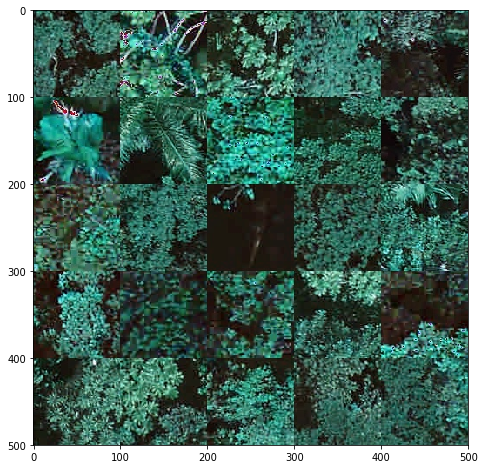

In [311]:
fig=plt.figure(figsize=(8,8))

for i in range(len(max_clusters)):
    cluster_img = cv2.imread('vgg19_model_fc1_' + max_clusters[i] + '.jpg')
    fig.add_subplot(1, len(max_clusters), i+1)
    plt.imshow(cluster_img)

plt.show()

# KMeans VGG16

In [53]:
kmeans1 = KMeans(n_clusters=20)

In [57]:
vgg16_model_fc1_features.values.shape

(40000, 4096)

In [58]:
kmeans1.fit(vgg16_model_fc1_features.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
output1 = kmeans1.predict(vgg16_model_fc1_features.values)

In [60]:
# Visualization
labels = ["cluster" + str(i) for i in range(20)]
cluster_dict = dict.fromkeys(labels, None) # dict with cluster number as keys and indices of relevant patches as values

for i in range(len(output1)):
    if cluster_dict["cluster" + str(output1[i])] == None:
        cluster_dict["cluster" + str(output1[i])] = [i]
    else:
        cluster_dict["cluster" + str(output1[i])].append(i)

In [48]:
maxcount = max(len(v) for v in cluster_dict.values())
max_clusters = [k for k, v in cluster_dict.items() if len(v) == maxcount]

max_clusters

['cluster0']

In [49]:
import random

for cluster in max_clusters:
    # we will view a random 25 patches for each cluster
    indices = cluster_dict[cluster] # indices of patches
    indices_pos = random.sample(range(len(indices)), 25) # positions of selected elements in indices
    
    # create new_img and initialize with the first patch 
    new_img = np.zeros(shape=(500, 500, 3))
    
    for i in range(5):
        for j in range(5):
            patch_id = i*5 + j
            new_img[i*100:(i+1)*100, j*100:(j+1)*100] = patches0[indices[indices_pos[patch_id]]]
        
    cv2.imwrite('vgg16_model_fc1_' + cluster +'.jpg', new_img)

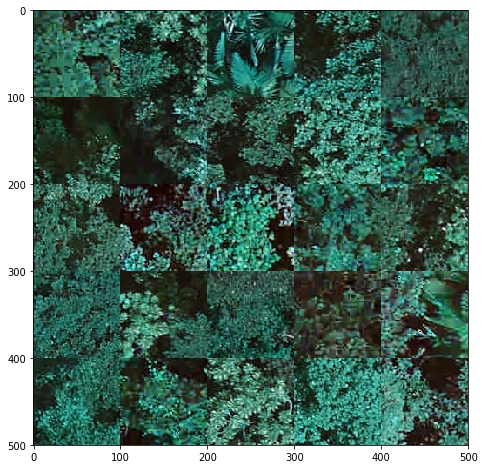

In [50]:
fig=plt.figure(figsize=(8,8))

for i in range(len(max_clusters)):
    cluster_img = cv2.imread('vgg16_model_fc1_' + max_clusters[i] + '.jpg')
    fig.add_subplot(1, len(max_clusters), i+1)
    plt.imshow(cluster_img)

plt.show()

## KMeans Inception_V3***

In [61]:
kmeans = KMeans(n_clusters=20)

In [62]:
kmeans.fit(inception_model_avg_pool_features.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
output = kmeans.predict(inception_model_avg_pool_features.values)

In [64]:
# Visualization
labels = ["cluster" + str(i) for i in range(20)]
cluster_dict = dict.fromkeys(labels, None) # dict with cluster number as keys and indices of relevant patches as values

for i in range(len(output)):
    if cluster_dict["cluster" + str(output[i])] == None:
        cluster_dict["cluster" + str(output[i])] = [i]
    else:
        cluster_dict["cluster" + str(output[i])].append(i)

In [65]:
maxcount = max(len(v) for v in cluster_dict.values())
max_clusters = [k for k, v in cluster_dict.items() if len(v) == maxcount]

max_clusters

['cluster0']

In [66]:
for cluster in max_clusters:
    # we will view a random 25 patches for each cluster
    indices = cluster_dict[cluster] # indices of patches
    indices_pos = random.sample(range(len(indices)), 25) # positions of selected elements in indices
    
    # create new_img and initialize with the first patch 
    new_img = np.zeros(shape=(500, 500, 3))
    
    for i in range(5):
        for j in range(5):
            patch_id = i*5 + j
            new_img[i*100:(i+1)*100, j*100:(j+1)*100] = patches0[indices[indices_pos[patch_id]]]
        
    cv2.imwrite('inception_model_avg_pool_' + cluster +'.jpg', new_img)

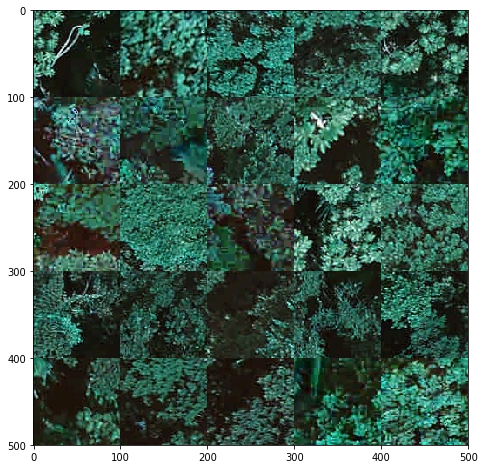

In [67]:
fig=plt.figure(figsize=(8,8))

for i in range(len(max_clusters)):
    cluster_img = cv2.imread('inception_model_avg_pool_' + max_clusters[i] + '.jpg')
    fig.add_subplot(1, len(max_clusters), i+1)
    plt.imshow(cluster_img)

plt.show()

## KMeans ResNet

In [35]:
kmeans = KMeans(n_clusters=20)

In [36]:
kmeans.fit(resnet_model_avg_pool_features.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
output = kmeans.predict(resnet_model_avg_pool_features.values)

In [51]:
# Visualization
labels = ["cluster" + str(i) for i in range(20)]
cluster_dict = dict.fromkeys(labels, None) # dict with cluster number as keys and indices of relevant patches as values

for i in range(len(output)):
    if cluster_dict["cluster" + str(output[i])] == None:
        cluster_dict["cluster" + str(output[i])] = [i]
    else:
        cluster_dict["cluster" + str(output[i])].append(i)

In [52]:
maxcount = max(len(v) for v in cluster_dict.values())
max_clusters = [k for k, v in cluster_dict.items() if len(v) == maxcount]

max_clusters

['cluster1']

In [53]:
for cluster in max_clusters:
    # we will view a random 25 patches for each cluster
    indices = cluster_dict[cluster] # indices of patches
    indices_pos = random.sample(range(len(indices)), 25) # positions of selected elements in indices
    
    # create new_img and initialize with the first patch 
    new_img = np.zeros(shape=(500, 500, 3))
    
    for i in range(5):
        for j in range(5):
            patch_id = i*5 + j
            new_img[i*100:(i+1)*100, j*100:(j+1)*100] = patches0[indices[indices_pos[patch_id]]]
        
    cv2.imwrite('resnet_model_avg_pool_' + cluster +'.jpg', new_img)

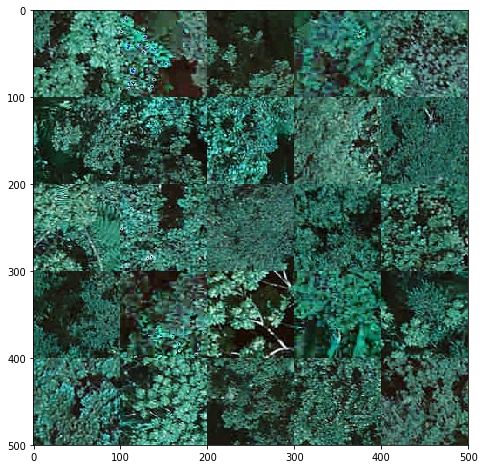

In [55]:
fig=plt.figure(figsize=(8,8))

for i in range(len(max_clusters)):
    cluster_img = cv2.imread('resnet_model_avg_pool_' + max_clusters[i] + '.jpg')
    fig.add_subplot(1, len(max_clusters), i+1)
    plt.imshow(cluster_img)

plt.show()

# Weak supervision --> LFDP ground labels

In this csv file, each row represents a ground observation. And the feature “pix_1” corresponds the column in the image, and “pix_2” corresponds to the row in the image. For example, the first data point has value pix_1 = 8132, pix_2 = 16017, which means its location is 16017th row, and 8132nd column in the image.

In [1]:
import pandas as pd

In [14]:
lfdp_ground_labels = pd.read_csv("LFDP_ground_labels.csv")
lfdp_ground_labels = lfdp_ground_labels.drop('Unnamed: 0', axis=1)
lfdp_ground_labels

,Unnamed: 0.1,STEM.TAG,QUAD,SUBQUAD,X,Y,SPECIES,CENSUS,DIAM,ALIVE,coords.x1,coords.x2,pix_1,pix_2
0,483980,10.0,101,11,0.60,2.23,DACEXC,6,60.70,D,265144.390704,254180.204800,8132,16017
1,483981,11.0,101,11,1.60,2.90,PREMON,6,15.70,A,265145.391769,254180.870936,8162,15997
2,483982,12.0,101,11,3.05,3.51,GUEVAL,6,15.40,A,265146.842029,254181.476333,8205,15979
3,483983,600.0,101,11,4.14,4.35,PREMON,6,9.00,A,265147.933579,254182.311818,8238,15954
4,483984,601.0,101,11,0.90,4.68,EUGSTA,6,3.20,A,265144.699007,254182.647429,8141,15944
5,483985,129502.0,101,11,1.58,3.23,TETBAL,6,1.47,A,265145.372966,254181.200065,8161,15987
6,483986,129503.0,101,11,0.96,4.19,TETBAL,6,NaN,D,265144.757189,254182.158662,8143,15958
7,483987,129504.0,101,11,1.77,4.37,TETBAL,6,1.71,A,265145.566764,254182.336534,8167,15953
8,483988,175680.0,101,11,0.71,2.08,MARREC,6,3.61,A,265144.500027,254180.054993,8135,16021
9,483989,14.0,101,12,1.68,8.91,PREMON,6,16.50,A,265145.492998,254186.864176,8166,15817


## Identifying palm cluster (PREMON) using label information
palm vs. non-palm clusters

In [83]:
lfdp_palm = lfdp_ground_labels.loc[lfdp_ground_labels['SPECIES'] == 'PREMON']
lfdp_palm

,Unnamed: 0.1,STEM.TAG,QUAD,SUBQUAD,X,Y,SPECIES,CENSUS,DIAM,ALIVE,coords.x1,coords.x2,pix_1,pix_2
1,483981,11.0,101,11,1.60,2.90,PREMON,6,15.7,A,265145.391769,254180.870936,8162,15997
3,483983,600.0,101,11,4.14,4.35,PREMON,6,9.0,A,265147.933579,254182.311818,8238,15954
9,483989,14.0,101,12,1.68,8.91,PREMON,6,16.5,A,265145.492998,254186.864176,8166,15817
10,483990,15.0,101,12,3.77,8.91,PREMON,6,13.0,A,265147.580253,254186.859969,8228,15817
11,483991,29399.0,101,12,4.78,6.34,PREMON,6,13.6,A,265148.579803,254184.295034,8258,15895
15,483995,129507.0,101,13,0.28,12.32,PREMON,6,10.7,A,265144.106942,254190.267575,8124,15715
16,483996,129508.0,101,13,2.46,14.51,PREMON,6,11.0,A,265146.291853,254192.447139,8190,15650
19,483999,18.0,101,14,1.97,15.44,PREMON,6,17.4,A,265145.805798,254193.375556,8176,15622
22,484002,33712.0,101,14,1.27,19.29,PREMON,6,13.1,A,265145.120384,254197.216332,8155,15506
23,484003,24.0,101,21,6.52,3.03,PREMON,6,17.5,A,265150.305767,254180.990673,8309,15994


In [24]:
import numpy as np

In [56]:
import re
cluster_ids = []

for s in cluster_dict.keys():
    #print(s.split())
    cluster_ids.append(re.findall('\d+', s)[0])

print(cluster_ids)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


In [62]:
for key in cluster_dict.keys():
    print(key, len(cluster_dict[key]))

cluster0 32030
cluster1 484
cluster2 516
cluster3 316
cluster4 535
cluster5 511
cluster6 461
cluster7 315
cluster8 618
cluster9 229
cluster10 287
cluster11 289
cluster12 455
cluster13 222
cluster14 470
cluster15 487
cluster16 314
cluster17 400
cluster18 625
cluster19 436


In [52]:
print(cluster_dict)

{'cluster0': [7375, 7454, 7972, 7973, 7974, 7975, 7976, 7977, 7978, 7979, 7980, 7981, 7982, 7983, 7984, 7985, 7986, 7987, 7988, 7989, 7990, 7991, 7992, 7993, 7994, 7995, 7996, 7997, 7998, 7999, 8000, 8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8009, 8010, 8011, 8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032, 8033, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8041, 8042, 8043, 8044, 8045, 8046, 8047, 8048, 8049, 8050, 8051, 8052, 8053, 8054, 8055, 8056, 8057, 8058, 8059, 8060, 8061, 8062, 8063, 8064, 8065, 8066, 8067, 8068, 8069, 8070, 8071, 8072, 8073, 8074, 8075, 8076, 8077, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8085, 8086, 8087, 8088, 8089, 8090, 8091, 8092, 8093, 8094, 8095, 8096, 8097, 8098, 8099, 8100, 8101, 8102, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127, 8128, 8129, 8130, 8131, 8132, 8133, 81

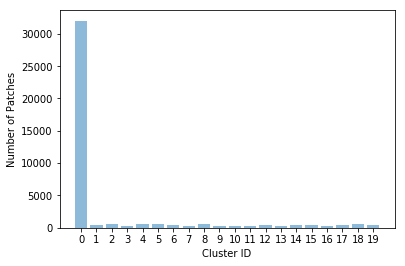

In [61]:
y_pos = np.arange(len(cluster_dict.keys()))
sizes_of_clusters = [len(cluster) for cluster in cluster_dict.values()]

plt.bar(y_pos, sizes_of_clusters, align='center', alpha=0.5)

    
plt.xticks(y_pos, cluster_ids)
plt.xlabel('Cluster ID')
plt.ylabel('Number of Patches')

plt.show()

In [94]:
cluster_dict.keys()

dict_keys(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9', 'cluster10', 'cluster11', 'cluster12', 'cluster13', 'cluster14', 'cluster15', 'cluster16', 'cluster17', 'cluster18', 'cluster19'])

In [111]:
palm_relevance = dict()

for key in cluster_dict.keys():
    if key != 'cluster0':
        count = 0
        for i in cluster_dict[key]:
            row = int(i/200)
            col = i%200
           # print(i, row, col)
                
            for x in range(row*100, (row+1)*100):
                for y in range(col*100, (col+1)*100): 
                    if y in lfdp_palm['pix_1'] and x in lfdp_palm['pix_2']: 
                        count += 1
                        break
                else:
                    continue # only executed if the inner loop did NOT break
                break # only executed if the inner loop DID break
            
            print(count)
        palm_relevance[key] = count / len(cluster_dict[key])
    
    
palm_relevance

2 0 2
1
5 0 5
2
19 0 19
3
50 0 50
4
69 0 69
5
142 0 142
6
144 0 144
7
163 0 163
8
180 0 180
9
214 1 14
10
220 1 20
11
223 1 23
12
239 1 39
13
292 1 92
14
339 1 139
15
360 1 160
16
361 1 161
17
382 1 182
18
400 2 0
19
455 2 55
20
459 2 59
21
460 2 60
22
464 2 64
23
469 2 69
24
480 2 80
25
485 2 85
26
504 2 104
27
507 2 107
28
509 2 109
29
510 2 110
30
519 2 119
31
523 2 123
32
525 2 125
33
560 2 160
34
573 2 173
35
582 2 182
36
583 2 183
37
584 2 184
38
587 2 187
39
644 3 44
40
662 3 62
41
665 3 65
42
667 3 67
43
668 3 68
44
678 3 78
45
693 3 93
46
700 3 100
47
723 3 123
48
724 3 124
49
741 3 141
50
747 3 147
51
789 3 189
52
807 4 7
53
816 4 16
54
826 4 26
55
844 4 44
56
851 4 51
57
859 4 59
58
863 4 63
59
879 4 79
60
881 4 81
61
904 4 104
62
907 4 107
63
922 4 122
64
927 4 127
65
939 4 139
66
946 4 146
67
963 4 163
68
969 4 169
69
1000 5 0
70
1002 5 2
71
1023 5 23
72
1025 5 25
73
1028 5 28
74
1030 5 30
75
1031 5 31
76
1054 5 54
77
1063 5 63
78
1065 5 65
79
1080 5 80
80
1092 5 92
81
110

108
2363 11 163
109
2364 11 164
110
2372 11 172
111
2409 12 9
112
2424 12 24
113
2462 12 62
114
2480 12 80
115
2481 12 81
116
2490 12 90
117
2501 12 101
118
2555 12 155
119
2556 12 156
120
2570 12 170
121
2584 12 184
122
2634 13 34
123
2640 13 40
124
2654 13 54
125
2671 13 71
126
2697 13 97
127
2722 13 122
128
2735 13 135
129
2761 13 161
130
2908 14 108
131
2918 14 118
132
2923 14 123
133
2949 14 149
134
2957 14 157
135
2958 14 158
136
2962 14 162
137
2964 14 164
138
2990 14 190
139
2999 14 199
140
3041 15 41
141
3119 15 119
142
3120 15 120
143
3128 15 128
144
3153 15 153
145
3160 15 160
146
3191 15 191
147
3193 15 193
148
3197 15 197
149
3230 16 30
150
3231 16 31
151
3238 16 38
152
3269 16 69
153
3273 16 73
154
3332 16 132
155
3397 16 197
156
3400 17 0
157
3410 17 10
158
3454 17 54
159
3456 17 56
160
3494 17 94
161
3502 17 102
162
3555 17 155
163
3562 17 162
164
3563 17 163
165
3573 17 173
166
3595 17 195
167
3606 18 6
168
3615 18 15
169
3629 18 29
170
3632 18 32
171
3684 18 84
172
36

145
4434 22 34
146
4581 22 181
147
4589 22 189
148
4675 23 75
149
4678 23 78
150
4706 23 106
151
4718 23 118
152
4721 23 121
153
4740 23 140
154
4790 23 190
155
4944 24 144
156
4951 24 151
157
4959 24 159
158
4996 24 196
159
4998 24 198
160
5001 25 1
161
5021 25 21
162
5030 25 30
163
5033 25 33
164
5034 25 34
165
5059 25 59
166
5075 25 75
167
5099 25 99
168
5111 25 111
169
5115 25 115
170
5149 25 149
171
5156 25 156
172
5189 25 189
173
5191 25 191
174
5192 25 192
175
5194 25 194
176
5219 26 19
177
5228 26 28
178
5230 26 30
179
5231 26 31
180
5234 26 34
181
5236 26 36
182
5237 26 37
183
5244 26 44
184
5258 26 58
185
5270 26 70
186
5311 26 111
187
5312 26 112
188
5313 26 113
189
5315 26 115
190
5316 26 116
191
5317 26 117
192
5321 26 121
193
5353 26 153
194
5395 26 195
195
5396 26 196
196
5399 26 199
197
5429 27 29
198
5431 27 31
199
5433 27 33
200
5434 27 34
201
5467 27 67
202
5474 27 74
203
5477 27 77
204
5507 27 107
205
5510 27 110
206
5513 27 113
207
5516 27 116
208
5555 27 155
209
5

382
6094 30 94
383
6116 30 116
384
6183 30 183
385
6188 30 188
386
6218 31 18
387
6242 31 42
388
6247 31 47
389
6252 31 52
390
6256 31 56
391
6263 31 63
392
6281 31 81
393
6293 31 93
394
6317 31 117
395
6319 31 119
396
6321 31 121
397
6328 31 128
398
6336 31 136
399
6340 31 140
400
6344 31 144
401
6345 31 145
402
6347 31 147
403
6353 31 153
404
6371 31 171
405
6378 31 178
406
6407 32 7
407
6409 32 9
408
6442 32 42
409
6448 32 48
410
6459 32 59
411
6463 32 63
412
6471 32 71
413
6499 32 99
414
6514 32 114
415
6530 32 130
416
6574 32 174
417
6576 32 176
418
6609 33 9
419
6612 33 12
420
6614 33 14
421
6627 33 27
422
6640 33 40
423
6668 33 68
424
6670 33 70
425
6673 33 73
426
6696 33 96
427
6710 33 110
428
6715 33 115
429
6720 33 120
430
6721 33 121
431
6725 33 125
432
6728 33 128
433
6767 33 167
434
6768 33 168
435
6771 33 171
436
6775 33 175
437
6783 33 183
438
6787 33 187
439
6795 33 195
440
6807 34 7
441
6809 34 9
442
6811 34 11
443
6814 34 14
444
6816 34 16
445
6861 34 61
446
6869 34 6

446
5908 29 108
447
5937 29 137
448
5947 29 147
449
5978 29 178
450
6014 30 14
451
6018 30 18
452
6096 30 96
453
6100 30 100
454
6110 30 110
455
6132 30 132
456
6133 30 133
457
6150 30 150
458
6190 30 190
459
6213 31 13
460
6216 31 16
461
6217 31 17
462
6255 31 55
463
6268 31 68
464
6308 31 108
465
6322 31 122
466
6332 31 132
467
6343 31 143
468
6351 31 151
469
6388 31 188
470
6394 31 194
471
6399 31 199
472
6428 32 28
473
6431 32 31
474
6453 32 53
475
6456 32 56
476
6507 32 107
477
6525 32 125
478
6535 32 135
479
6548 32 148
480
6552 32 152
481
6613 33 13
482
6655 33 55
483
6683 33 83
484
6708 33 108
485
6762 33 162
486
6785 33 185
487
6786 33 186
488
6803 34 3
489
6842 34 42
490
6875 34 75
491
6883 34 83
492
6931 34 131
493
6945 34 145
494
6958 34 158
495
6961 34 161
496
7012 35 12
497
7033 35 33
498
7043 35 43
499
7116 35 116
500
7117 35 117
501
7150 35 150
502
7276 36 76
503
7281 36 81
504
7321 36 121
505
7359 36 159
506
7485 37 85
507
7560 37 160
508
7609 38 9
509
7800 39 0
510
79

1113 5 113
36
1179 5 179
37
1196 5 196
38
1275 6 75
39
1315 6 115
40
1395 6 195
41
1435 7 35
42
1438 7 38
43
1599 7 199
44
1617 8 17
45
1674 8 74
46
1755 8 155
47
1839 9 39
48
1875 9 75
49
1876 9 76
50
1951 9 151
51
1952 9 152
52
1960 9 160
53
2037 10 37
54
2158 10 158
55
2192 10 192
56
2200 11 0
57
2224 11 24
58
2232 11 32
59
2237 11 37
60
2348 11 148
61
2354 11 154
62
2398 11 198
63
2399 11 199
64
2400 12 0
65
2432 12 32
66
2436 12 36
67
2439 12 39
68
2471 12 71
69
2478 12 78
70
2479 12 79
71
2513 12 113
72
2557 12 157
73
2673 13 73
74
2714 13 114
75
2716 13 116
76
2760 13 160
77
2882 14 82
78
2954 14 154
79
2994 14 194
80
3071 15 71
81
3109 15 109
82
3110 15 110
83
3114 15 114
84
3116 15 116
85
3156 15 156
86
3159 15 159
87
3196 15 196
88
3199 15 199
89
3236 16 36
90
3272 16 72
91
3276 16 76
92
3315 16 115
93
3318 16 118
94
3321 16 121
95
3325 16 125
96
3337 16 137
97
3350 16 150
98
3352 16 152
99
3353 16 153
100
3354 16 154
101
3388 16 188
102
3390 16 190
103
3405 17 5
104
3428 17 

5409 27 9
345
5412 27 12
346
5414 27 14
347
5430 27 30
348
5441 27 41
349
5443 27 43
350
5446 27 46
350
5449 27 49
351
5451 27 51
352
5452 27 52
353
5453 27 53
354
5461 27 61
355
5464 27 64
356
5483 27 83
357
5484 27 84
358
5487 27 87
359
5489 27 89
360
5491 27 91
361
5492 27 92
362
5493 27 93
363
5501 27 101
364
5508 27 108
365
5526 27 126
366
5547 27 147
367
5552 27 152
368
5553 27 153
369
5564 27 164
370
5566 27 166
371
5567 27 167
372
5593 27 193
373
5603 28 3
374
5606 28 6
375
5607 28 7
376
5610 28 10
377
5623 28 23
378
5628 28 28
379
5631 28 31
380
5649 28 49
381
5650 28 50
382
5673 28 73
383
5691 28 91
384
5694 28 94
385
5703 28 103
386
5714 28 114
387
5731 28 131
388
5746 28 146
389
5757 28 157
390
5765 28 165
391
5771 28 171
392
5772 28 172
393
5773 28 173
394
5774 28 174
395
5776 28 176
396
5791 28 191
397
5802 29 2
398
5803 29 3
399
5804 29 4
400
5805 29 5
401
5806 29 6
402
5812 29 12
403
5818 29 18
404
5822 29 22
405
5836 29 36
406
5844 29 44
407
5845 29 45
408
5853 29 53
4

123
2674 13 74
124
2703 13 103
125
2750 13 150
126
2790 13 190
127
2848 14 48
128
2860 14 60
129
2887 14 87
130
2899 14 99
131
2921 14 121
132
3050 15 50
133
3059 15 59
134
3061 15 61
135
3078 15 78
136
3118 15 118
137
3142 15 142
138
3178 15 178
139
3243 16 43
140
3244 16 44
141
3287 16 87
142
3288 16 88
143
3328 16 128
144
3329 16 129
145
3349 16 149
146
3361 16 161
147
3364 16 164
148
3379 16 179
149
3413 17 13
150
3446 17 46
150
3526 17 126
151
3596 17 196
152
3675 18 75
153
3703 18 103
154
3748 18 148
155
3822 19 22
156
3842 19 42
157
3890 19 90
158
3938 19 138
159
3978 19 178
160
3985 19 185
161
4048 20 48
162
4146 20 146
163
4249 21 49
164
4330 21 130
165
4345 21 145
166
4464 22 64
167
4508 22 108
168
4545 22 145
169
4652 23 52
170
4677 23 77
171
4775 23 175
172
4776 23 176
173
4780 23 180
174
4856 24 56
175
4905 24 105
176
4988 24 188
177
5025 25 25
178
5027 25 27
179
5101 25 101
180
5110 25 110
181
5114 25 114
182
5306 26 106
183
5327 26 127
184
5365 26 165
185
5371 26 171
186

147
2795 13 195
148
2836 14 36
149
2851 14 51
150
2854 14 54
151
2869 14 69
152
2876 14 76
153
2877 14 77
154
2909 14 109
155
2914 14 114
156
2915 14 115
157
2916 14 116
158
2951 14 151
159
2972 14 172
160
2988 14 188
161
2996 14 196
162
3013 15 13
163
3025 15 25
164
3031 15 31
165
3036 15 36
166
3040 15 40
167
3043 15 43
168
3048 15 48
169
3069 15 69
170
3070 15 70
171
3075 15 75
172
3076 15 76
173
3115 15 115
174
3135 15 135
175
3140 15 140
176
3149 15 149
177
3169 15 169
178
3189 15 189
179
3195 15 195
180
3198 15 198
181
3200 16 0
182
3229 16 29
183
3239 16 39
184
3256 16 56
185
3270 16 70
186
3271 16 71
187
3274 16 74
188
3280 16 80
189
3283 16 83
190
3297 16 97
191
3324 16 124
192
3348 16 148
193
3372 16 172
194
3386 16 186
195
3399 16 199
196
3407 17 7
197
3414 17 14
198
3437 17 37
199
3438 17 38
200
3477 17 77
201
3478 17 78
202
3483 17 83
203
3512 17 112
204
3517 17 117
205
3519 17 119
206
3529 17 129
207
3534 17 134
208
3536 17 136
209
3567 17 167
210
3568 17 168
211
3569 17 

111
1793 8 193
112
1800 9 0
113
1809 9 9
114
1814 9 14
115
1816 9 16
116
1833 9 33
117
1868 9 68
118
1870 9 70
119
1877 9 77
120
1905 9 105
121
1907 9 107
122
1915 9 115
123
1919 9 119
124
1928 9 128
125
1937 9 137
126
1966 9 166
127
1976 9 176
128
1987 9 187
129
1994 9 194
130
2010 10 10
131
2029 10 29
132
2060 10 60
133
2069 10 69
134
2074 10 74
135
2108 10 108
136
2115 10 115
137
2117 10 117
138
2142 10 142
139
2147 10 147
140
2152 10 152
141
2153 10 153
142
2155 10 155
143
2156 10 156
144
2157 10 157
145
2165 10 165
146
2171 10 171
147
2177 10 177
148
2179 10 179
149
2187 10 187
150
2198 10 198
151
2220 11 20
152
2229 11 29
153
2234 11 34
154
2246 11 46
154
2265 11 65
155
2271 11 71
156
2288 11 88
157
2293 11 93
158
2304 11 104
159
2356 11 156
160
2357 11 157
161
2370 11 170
162
2378 11 178
163
2381 11 181
164
2411 12 11
165
2437 12 37
166
2446 12 46
166
2450 12 50
167
2451 12 51
168
2465 12 65
169
2486 12 86
170
2526 12 126
171
2542 12 142
172
2547 12 147
173
2554 12 154
174
2563 

217
4270 21 70
218
4275 21 75
219
4276 21 76
220
4282 21 82
221
4283 21 83
222
4284 21 84
223
4295 21 95
224
4308 21 108
225
4310 21 110
226
4316 21 116
227
4317 21 117
228
4323 21 123
229
4324 21 124
230
4326 21 126
231
4358 21 158
232
4359 21 159
233
4360 21 160
234
4362 21 162
235
4363 21 163
236
4364 21 164
237
4366 21 166
238
4390 21 190
239
4396 21 196
240
4400 22 0
241
4401 22 1
242
4405 22 5
243
4406 22 6
244
4407 22 7
245
4430 22 30
246
4432 22 32
247
4433 22 33
248
4435 22 35
249
4436 22 36
250
4445 22 45
251
4453 22 53
252
4460 22 60
253
4466 22 66
254
4470 22 70
255
4471 22 71
256
4505 22 105
257
4509 22 109
258
4510 22 110
259
4514 22 114
260
4516 22 116
261
4521 22 121
262
4522 22 122
263
4527 22 127
264
4548 22 148
265
4549 22 149
266
4551 22 151
267
4552 22 152
268
4556 22 156
269
4557 22 157
270
4559 22 159
271
4560 22 160
272
4561 22 161
273
4564 22 164
274
4600 23 0
275
4603 23 3
276
4621 23 21
277
4629 23 29
278
4630 23 30
279
4637 23 37
280
4643 23 43
281
4646 23 4

6838 34 38
286
6847 34 47
287
6878 34 78
288
6941 34 141
289
6974 34 174
290
6995 34 195
291
7061 35 61
292
7086 35 86
293
7094 35 94
294
7106 35 106
295
7141 35 141
296
7231 36 31
297
7269 36 69
298
7295 36 95
299
7322 36 122
300
7334 36 134
301
7399 36 199
302
7441 37 41
303
7531 37 131
304
7532 37 132
305
7568 37 168
306
7578 37 178
307
7646 38 46
307
7702 38 102
308
7785 38 185
309
7793 38 193
310
7832 39 32
311
7871 39 71
312
7964 39 164
313
18 0 18
1
21 0 21
2
58 0 58
3
61 0 61
4
64 0 64
5
80 0 80
6
81 0 81
7
97 0 97
8
101 0 101
9
120 0 120
10
140 0 140
11
183 0 183
12
215 1 15
13
225 1 25
14
242 1 42
15
243 1 43
16
254 1 54
17
255 1 55
18
257 1 57
19
259 1 59
20
265 1 65
21
297 1 97
22
305 1 105
23
306 1 106
24
334 1 134
25
337 1 137
26
341 1 141
27
345 1 145
28
359 1 159
29
374 1 174
30
378 1 178
31
386 1 186
32
413 2 13
33
418 2 18
34
419 2 19
35
451 2 51
36
453 2 53
37
458 2 58
38
496 2 96
39
497 2 97
40
498 2 98
41
499 2 99
42
537 2 137
43
538 2 138
44
539 2 139
45
544 2 144

2175 10 175
194
2181 10 181
195
2194 10 194
196
2202 11 2
197
2221 11 21
198
2251 11 51
199
2276 11 76
200
2296 11 96
201
2298 11 98
202
2342 11 142
203
2361 11 161
204
2386 11 186
205
2416 12 16
206
2429 12 29
207
2452 12 52
208
2458 12 58
209
2476 12 76
210
2477 12 77
211
2488 12 88
212
2532 12 132
213
2535 12 135
214
2548 12 148
215
2572 12 172
216
2579 12 179
217
2580 12 180
218
2597 12 197
219
2598 12 198
220
2606 13 6
221
2607 13 7
222
2614 13 14
223
2622 13 22
224
2629 13 29
225
2668 13 68
226
2670 13 70
227
2686 13 86
228
2687 13 87
229
2688 13 88
230
2690 13 90
231
2691 13 91
232
2700 13 100
233
2709 13 109
234
2710 13 110
235
2723 13 123
236
2745 13 145
237
2769 13 169
238
2785 13 185
239
2789 13 189
240
2799 13 199
241
2800 14 0
242
2823 14 23
243
2825 14 25
244
2826 14 26
245
2844 14 44
246
2845 14 45
247
2865 14 65
248
2898 14 98
249
2904 14 104
250
2919 14 119
251
2925 14 125
252
2929 14 129
253
2943 14 143
254
2945 14 145
255
2947 14 147
256
2952 14 152
257
2960 14 160
2

193
4350 21 150
194
4351 21 151
195
4368 21 168
196
4372 21 172
197
4375 21 175
198
4389 21 189
199
4463 22 63
200
4474 22 74
201
4500 22 100
202
4507 22 107
203
4524 22 124
204
4533 22 133
205
4587 22 187
206
4616 23 16
207
4625 23 25
208
4744 23 144
209
4746 23 146
210
4778 23 178
211
4797 23 197
212
4818 24 18
213
4822 24 22
214
4857 24 57
215
4864 24 64
216
4876 24 76
217
4891 24 91
218
4898 24 98
219
4899 24 99
220
4903 24 103
221
4967 24 167
222
4991 24 191
223
5007 25 7
224
5015 25 15
225
5016 25 16
226
5017 25 17
227
5098 25 98
228
5103 25 103
229
5109 25 109
230
5145 25 145
231
5151 25 151
232
5164 25 164
233
5177 25 177
234
5178 25 178
235
5185 25 185
236
5186 25 186
237
5205 26 5
238
5229 26 29
239
5259 26 59
240
5269 26 69
241
5287 26 87
242
5308 26 108
243
5346 26 146
244
5384 26 184
245
5392 26 192
246
5403 27 3
247
5420 27 20
248
5427 27 27
249
5444 27 44
250
5445 27 45
251
5486 27 86
252
5500 27 100
253
5502 27 102
254
5511 27 111
255
5521 27 121
256
5524 27 124
257
553

{'cluster1': 0.993801652892562,
 'cluster2': 0.9941860465116279,
 'cluster3': 0.9968354430379747,
 'cluster4': 0.9962616822429906,
 'cluster5': 1.0,
 'cluster6': 0.9934924078091106,
 'cluster7': 0.9936507936507937,
 'cluster8': 0.9935275080906149,
 'cluster9': 0.9956331877729258,
 'cluster10': 0.9965156794425087,
 'cluster11': 1.0,
 'cluster12': 0.9956043956043956,
 'cluster13': 1.0,
 'cluster14': 0.9936170212765958,
 'cluster15': 0.9958932238193019,
 'cluster16': 0.9968152866242038,
 'cluster17': 0.99,
 'cluster18': 0.992,
 'cluster19': 0.9931192660550459}

In [109]:
count = 0
key = 'cluster6'
for i in cluster_dict[key]:
    row = int(i/200)
    col = i%200
    print(i, row, col)

    for x in range(row*100, (row+1)*100):
        for y in range(col*100, (col+1)*100): 
            if y in lfdp_palm['pix_1'] and x in lfdp_palm['pix_2']: 
                count += 1
                break
        else:
            continue # only executed if the inner loop did NOT break
        break # only executed if the inner loop DID break

    print(count)
palm_relevance[key] = count / len(cluster_dict[key])

palm_relevance

8 0 8
1
16 0 16
2
43 0 43
3
59 0 59
4
96 0 96
5
99 0 99
6
123 0 123
7
173 0 173
8
176 0 176
9
177 0 177
10
181 0 181
11
186 0 186
12
216 1 16
13
244 1 44
14
260 1 60
15
262 1 62
16
264 1 64
17
282 1 82
18
294 1 94
19
296 1 96
20
301 1 101
21
322 1 122
22
332 1 132
23
335 1 135
24
336 1 136
25
343 1 143
26
363 1 163
27
364 1 164
28
365 1 165
29
371 1 171
30
372 1 172
31
376 1 176
32
380 1 180
33
381 1 181
34
403 2 3
35
414 2 14
36
420 2 20
37
421 2 21
38
423 2 23
39
439 2 39
40
441 2 41
41
481 2 81
42
502 2 102
43
518 2 118
44
521 2 121
45
522 2 122
46
542 2 142
47
558 2 158
48
562 2 162
49
568 2 168
50
579 2 179
51
581 2 181
52
602 3 2
53
613 3 13
54
616 3 16
55
622 3 22
56
646 3 46
56
648 3 48
57
650 3 50
58
656 3 56
59
661 3 61
60
679 3 79
61
682 3 82
62
686 3 86
63
696 3 96
64
706 3 106
65
734 3 134
66
759 3 159
67
768 3 168
68
774 3 174
69
776 3 176
70
781 3 181
71
821 4 21
72
853 4 53
73
866 4 66
74
899 4 99
75
958 4 158
76
999 4 199
77
1010 5 10
78
1013 5 13
79
1018 5 18
80
1019 

{'cluster1': 0.993801652892562, 'cluster6': 0.9934924078091106}

In [105]:
len(cluster_dict['cluster6'])

461

In [96]:
len(cluster_dict['cluster1'])

484

## Identifying cecropia cluster (CECSCH) using label information
cecropia vs. non-cercropia clusters

In [99]:
lfdp_cercropia = lfdp_ground_labels.loc[lfdp_ground_labels['SPECIES'] == 'CECSCH']
lfdp_cercropia

,Unnamed: 0.1,STEM.TAG,QUAD,SUBQUAD,X,Y,SPECIES,CENSUS,DIAM,ALIVE,coords.x1,coords.x2,pix_1,pix_2
89,484071,735.0,101,41,17.97,0.18,CECSCH,6,19.60,A,265161.730607,254178.125497,8652,16081
258,484243,807.0,103,11,4.24,43.12,CECSCH,6,22.40,A,265148.171075,254220.974535,8249,14794
629,484628,29158.0,106,44,17.12,118.78,CECSCH,6,27.90,A,265161.302736,254296.399638,8651,12532
744,484748,43192.0,108,22,9.51,148.89,CECSCH,6,12.30,A,265153.809620,254326.441793,8429,11629
850,484869,48490.0,109,31,10.10,160.12,CECSCH,6,NaN,A,265154.438710,254337.639589,8449,11293
851,484870,48491.0,109,31,10.64,160.46,CECSCH,6,24.80,A,265154.979207,254337.977563,8465,11283
853,484872,173838.0,109,31,10.10,160.12,CECSCH,6,NaN,D,265154.438710,254337.639589,8449,11293
952,484972,31267.0,110,24,5.17,195.05,CECSCH,6,NaN,D,265149.639182,254372.483037,8309,10247
959,484979,31331.0,110,31,13.58,182.48,CECSCH,6,15.30,A,265157.993512,254359.930826,8558,10625
992,485014,134310.0,110,41,19.70,181.65,CECSCH,6,27.00,A,265164.102526,254359.090799,8741,10650


In [112]:
cercropia_relevance = dict()

for key in cluster_dict.keys():
    if key != 'cluster0':
        count = 0
        for i in cluster_dict[key]:
            row = int(i/200)
            col = i%200
            #print(i, row, col)
                
            for x in range(row*100, (row+1)*100):
                for y in range(col*100, (col+1)*100): 
                    if y in lfdp_cercropia['pix_1'] and x in lfdp_cercropia['pix_2']: 
                        count += 1
                        break
                else:
                    continue # only executed if the inner loop did NOT break
                break # only executed if the inner loop DID break
            
            print(count)
        cercropia_relevance[key] = count / len(cluster_dict[key])
    
    
cercropia_relevance

1
1
1
1
2
2
3
3
4
4
4
4
4
4
4
4
4
4
5
6
7
8
9
10
11
12
13
14
14
15
16
17
17
17
18
19
20
21
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
24
24
24
25
25
26
27
27
27
28
29
30
30
30
30
30
30
31
32
33
33
34
35
35
35
36
37
38
38
39
40
40
41
41
42
42
43
44
45
46
47
48
49
49
49
50
51
52
53
53
54
55
56
57
57
57
57
57
58
58
58
59
60
61
62
63
63
63
63
63
63
63
63
63
63
63
63
64
65
66
66
67
68
69
69
69
70
71
72
73
74
75
75
76
77
78
78
79
79
80
81
81
81
82
83
84
85
86
87
87
88
89
89
89
90
91
92
92
93
94
94
95
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
97
97
98
99
100
100
101
102
102
103
104
105
106
107
108
109
110
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
11

12
12
12
12
12
12
12
12
12
13
14
15
15
16
17
18
19
19
20
21
21
21
21
22
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
26
27
28
28
29
29
29
29
29
29
30
31
32
32
33
34
35
36
36
37
37
37
37
38
38
39
40
40
41
42
43
44
45
46
47
48
49
50
50
51
51
52
53
54
54
55
56
57
57
58
59
60
61
61
61
62
63
64
65
66
66
67
68
69
69
70
71
72
72
73
73
74
74
75
76
76
77
77
77
78
79
80
81
82
82
82
83
83
84
85
86
87
88
88
89
90
90
91
92
92
93
94
94
95
95
96
96
96
97
98
99
99
99
100
101
102
103
104
104
104
104
104
104
104
104
104
104
104
104
104
104
105
106
107
107
107
108
109
110
111
111
112
113
114
114
115
116
117
118
118
118
118
119
119
119
119
119
120
121
122
123
124
125
126
127
127
128
129
130
131
131
132
133
134
135
135
136
136
136
137
138
139
140
141
142
143
144
145
146
147
148
148
149
150
151
151
152
153
154
155
156
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157

140
140
141
141
141
142
142
143
144
144
144
145
146
147
148
149
149
149
149
150
151
151
152
152
153
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
155
156
156
156
157
158
159
160
161
162
162
163
164
164
164
165
166
166
166
166
167
168
169
170
170
171
172
172
173
174
175
176
177
177
178
178
178
178
179
180
181
182
183
184
185
186
186
187
188
189
1
1
2
2
3
4
5
5
5
5
5
5
5
5
5
5
6
6
6
7
7
8
9
9
10
11
12
12
12
13
14
15
16
17
17
17
18
19
19
19
20
21
22
23
24
25
25
25
25
26
26
27
27
27
27
27
27
27
27
27
27
27
28
29
29
30
31
32
32
32
33
34
35
36
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
38
39
39
40
40
41
42
43
44
45
46
47
48
49
50
50
50
51
51
52
53
54
55
56
57
58
59
60
61
61
62
63
63
63
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
81
82

165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
166
166
167
168
169
169
169
170
171
171
171
172
173
174
174
175
176
177
177
177
177
177
177
178
179
180
181
181
181
181
182
183
183
184
184
184
185
186
187
188
189
190
191
192
192
192
192
193
194
195
196
197
197
198
198
198
199
200
201
202
203
203
204
205
206
207
207
208
208
208
209
210
211
211
212
212
213
213
213
214
215
216
217
217
218
219
220
220
220
220
221
221
221
222
223
223
223
224
224
225
226
226
226
227
227
227
228
228
229
229
230
230
231
232
232
233
233
233
234
235
236
236
236
237
237
238
239
240
240
241
241
242
243
244
244
244
244
245
246
246
1
1
2
3
3
4
5
5
6
7
8
8
9
9
9
9
9
9
9
9
9
10
11
11
12
12
13
14
14
14
15
16
17
17
17
17
17
17
17
17
1

{'cluster1': 0.390495867768595,
 'cluster2': 0.41472868217054265,
 'cluster3': 0.43037974683544306,
 'cluster4': 0.4672897196261682,
 'cluster5': 0.3424657534246575,
 'cluster6': 0.44468546637744033,
 'cluster7': 0.3746031746031746,
 'cluster8': 0.41262135922330095,
 'cluster9': 0.4585152838427948,
 'cluster10': 0.4634146341463415,
 'cluster11': 0.3875432525951557,
 'cluster12': 0.4153846153846154,
 'cluster13': 0.545045045045045,
 'cluster14': 0.4297872340425532,
 'cluster15': 0.3839835728952772,
 'cluster16': 0.4171974522292994,
 'cluster17': 0.365,
 'cluster18': 0.3936,
 'cluster19': 0.39908256880733944}